In [1]:
import torch
import cv2 
import matplotlib.pyplot as plt

/home/joo/vsc/workspaces/my_utils/my_utils/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# 모델 anchor box clustering한 결과 
model = torch.load('runs/train/yolov5_single_X6/weights/best.pt')['model']

m = model.model[-1]  # Detect()
m.anchors  # in stride units
m.anchor_grid  # in pixel units

print(m.anchor_grid)



# print(len(m.anchor_grid))
# print(torch.Tensor(m.anchor_grid).view(-1,2))


# tensor([[ 10.,  13.],
#         [ 16.,  30.],
#         [ 33.,  23.],
#         [ 30.,  61.],
#         [ 62.,  45.],
#         [ 59., 119.],
#         [116.,  90.],
#         [156., 198.],
#         [373., 326.]])

In [2]:

# 이미지 읽기
file_name = ["C02_00036","C04_00186","C04_00207","C04_00211","C04_00216","C04_00221","C04_00225"]
for k in file_name:
    img=cv2.imread("../korad/images/train2022/"+k+".tiff")

    # 저번 시간에 공부한 shape - 높이 너비 및 채널 수 세 가지 값 반환
    image_copy = img.copy()

    # 높이 가져오기
    imgheight=img.shape[0]

    # 너비 가져오기
    imgwidth=img.shape[1]
    
    # M = 480
    # N = 320
    M = 480
    N = 320
    x1 = 0
    y1 = 0

    for i, y in enumerate(range(0, imgheight, M)):
        for j, x in enumerate(range(0, imgwidth, N)):
            if (imgheight - y) < M or (imgwidth - x) < N:
                break
                
            y1 = y + M
            x1 = x + N

            # # check whether the patch width or height exceeds the image width or height
            # if x1 >= imgwidth and y1 >= imgheight:
            #     x1 = imgwidth - 1
            #     y1 = imgheight - 1
            #     tiles = image_copy[y:y+M, x:x+N]
            #     # cv2.imwrite('saved_patches_2/'+k+'_'+str(i)+'_'+str(j)+'.jpg', tiles)
            #     cv2.rectangle(img, (x, y), (x1, y1), (255, 0, 0), 1)
            # elif y1 >= imgheight: # when patch height exceeds the image height
            #     y1 = imgheight - 1
            #     tiles = image_copy[y:y+M, x:x+N]
            #     # cv2.imwrite('saved_patches_2/'+k+'_'+str(i)+'_'+str(j)+'.jpg', tiles)
            #     cv2.rectangle(img, (x, y), (x1, y1), (255, 0, 0), 1)
            # elif x1 >= imgwidth: # when patch width exceeds the image width
            #     x1 = imgwidth - 1
            #     tiles = image_copy[y:y+M, x:x+N]
            #     # cv2.imwrite('saved_patches_2/'+k+'_'+str(i)+'_'+str(j)+'.jpg', tiles)
            #     cv2.rectangle(img, (x, y), (x1, y1), (255, 0, 0), 1)
            # else:
            #     tiles = image_copy[y:y+M, x:x+N]
            #     # cv2.imwrite('saved_patches_2/'+k+'_'+str(i)+'_'+str(j)+'.jpg', tiles)
            #     cv2.rectangle(img, (x, y), (x1, y1), (255, 0, 0), 1)

            # check whether the patch width or height exceeds the image width or height
            if x1 >= imgwidth and y1 >= imgheight:
                x1 = imgwidth - 1
                y1 = imgheight - 1
                tiles = image_copy[y:y+M+50, x:x+N]
                cv2.imwrite('saved_patches_3/'+k+'_'+str(i)+'_'+str(j)+'.jpg', tiles)
                cv2.rectangle(img, (x, y), (x1, y1+50), (50, 50, 50), 1)
            elif y1 >= imgheight: # when patch height exceeds the image height
                y1 = imgheight - 1
                tiles = image_copy[y:y+M, x:x+N+50]
                cv2.imwrite('saved_patches_3/'+k+'_'+str(i)+'_'+str(j)+'.jpg', tiles)
                cv2.rectangle(img, (x, y), (x1+50, y1), (0, 0, 255), 1)
            elif x1 >= imgwidth: # when patch width exceeds the image width
                x1 = imgwidth - 1
                tiles = image_copy[y:y+M+50, x:x+N]
                cv2.imwrite('saved_patches_3/'+k+'_'+str(i)+'_'+str(j)+'.jpg', tiles)
                cv2.rectangle(img, (x, y), (x1, y1+50), (0, 255, 0), 1)
            else:
                tiles = image_copy[y:y+M+50, x:x+N+50]
                cv2.imwrite('saved_patches_3/'+k+'_'+str(i)+'_'+str(j)+'.jpg', tiles)
                cv2.rectangle(img, (x, y), (x1+50, y1+50), (255, 0, 0), 1)

    
    # # 이미지 표시하기
    plt.figure(figsize=(20,20))
    plt.imshow(img)
    plt.show()
    plt.close()
    break

AttributeError: 'NoneType' object has no attribute 'copy'

In [3]:
import glob
file_name = ["C02_00036","C04_00186","C04_00207","C04_00211","C04_00216","C04_00221","C04_00225"]
for l in file_name:
    # if l != "C02_00036": break
    temp_list = glob.glob("./runs/detect/yolov5_single_X6_test32/"+l+"_*")
    temp_list.sort()
    # print(temp_list[0][38:-7])
    # break
    for g in range(24):
        im_1 = cv2.imread(temp_list[g])

        im_v_2 = im_1.copy()
        im_v_3 = im_1.copy()

        for i in range(3):
            for j in range(8):
                if j == 0 :
                    im_1 = cv2.imread("runs/detect/yolov5_single_X6_test32/"+temp_list[g][38:-7]+str(i)+"_"+str(j)+".jpg")
                    
                    continue
                im_temp = cv2.imread("runs/detect/yolov5_single_X6_test32/"+temp_list[g][38:-7]+str(i)+"_"+str(j)+".jpg")
                im_v_1 = cv2.hconcat([im_1, im_temp])
                im_1 = im_v_1
            if i == 0: im_v_2 = im_1; continue
            im_v_2 = cv2.vconcat([im_v_2,im_1])    
            # break
    
    print(im_v_2.shape)
    plt.figure(figsize=(20,20))
    plt.imshow(im_v_2)
    plt.show()
    plt.close()
    
    real_detect = cv2.imread("./runs/detect/yolov5_single_X6_test2/"+temp_list[g][38:-8]+".tiff")
    print(real_detect.shape)
    plt.figure(figsize=(15,15))    
    plt.imshow(real_detect)
    plt.show()
    plt.close()

IndexError: list index out of range

In [4]:
import glob
file_name = ["C02_00036","C04_00186","C04_00207","C04_00211","C04_00216","C04_00221","C04_00225"]
folder_path = "./saved_patches_2/" # ./saved_patches_2/
label_path = "./runs/detect/yolov5_single_X6_test4/labels/*"

for l in file_name:
    if l != "C02_00036": break
    temp_list = glob.glob(folder_path+l+"_*")
    temp_list.sort()
    # print(temp_list[0][18:]) # C02_00036_0_0.jpg 18
    temp_label_list = list(map(lambda x : x[44:], glob.glob(label_path))) # 44
    temp_label_list.sort()
    # print(temp_label_list) # C02_00036_0_1.txt
    # break
    for g in range(24):
        im_1 = cv2.imread(temp_list[g])
        im_v_2 = im_1.copy()
        im_v_3 = im_1.copy()

        for i in range(3):
            for j in range(8):
                if j == 0 :
                    im_1 = cv2.imread(folder_path+temp_list[g][18:-7]+str(i)+"_"+str(j)+".jpg") # 18
                    # print(im_1.shape)
                    try:
                        temp_label = temp_label_list[temp_label_list.index(temp_list[g][18:-7]+str(i)+"_"+str(j)+".txt")]
                        with open(label_path[:-1]+temp_label, "r") as f: 
                            for ff in f:
                                data = ff.strip().split(" ")                                
                                im_1 = cv2.rectangle(im_1, (int(data[1]), int(data[2])), (int(data[3]), int(data[4])), (0,0,255), 3)
                                # plt.imshow(im_1)
                                # plt.show()
                                # plt.close()
                    except ValueError: pass
                    continue
                # break
                
                im_temp = cv2.imread(folder_path+temp_list[g][18:-7]+str(i)+"_"+str(j)+".jpg") # 18
                # print(im_temp.shape)
                try:
                    temp_label = temp_label_list[temp_label_list.index(temp_list[g][18:-7]+str(i)+"_"+str(j)+".txt")]
                    with open(label_path[:-1]+temp_label, "r") as f:                             
                            for ff in f:
                                data = ff.strip().split(" ")                                
                                im_temp = cv2.rectangle(im_temp, (int(data[1]), int(data[2])), (int(data[3]), int(data[4])), (0,0,255), 3)
                                # plt.imshow(im_temp)
                                # plt.show()
                                # plt.close()
                
                except ValueError: pass
                # break
                im_v_1 = cv2.hconcat([im_1, im_temp])
                im_1 = im_v_1
            # break
            if i == 0: im_v_2 = im_1; continue
            im_v_2 = cv2.vconcat([im_v_2,im_1])
            
        # break

    print(im_v_2.shape)
    plt.figure(figsize=(20,20))
    plt.imshow(im_v_2)
    plt.show()
    plt.close()
    # print(real_detect.shape)
    # real_detect = cv2.imread("./runs/detect/yolov5_single_X6_test2/"+temp_list[g][36:-8]+".tiff")
    # plt.figure(figsize=(15,15))    
    # plt.imshow(real_detect)
    # plt.show()
    # plt.close()

IndexError: list index out of range

TypeError: Image data of dtype object cannot be converted to float

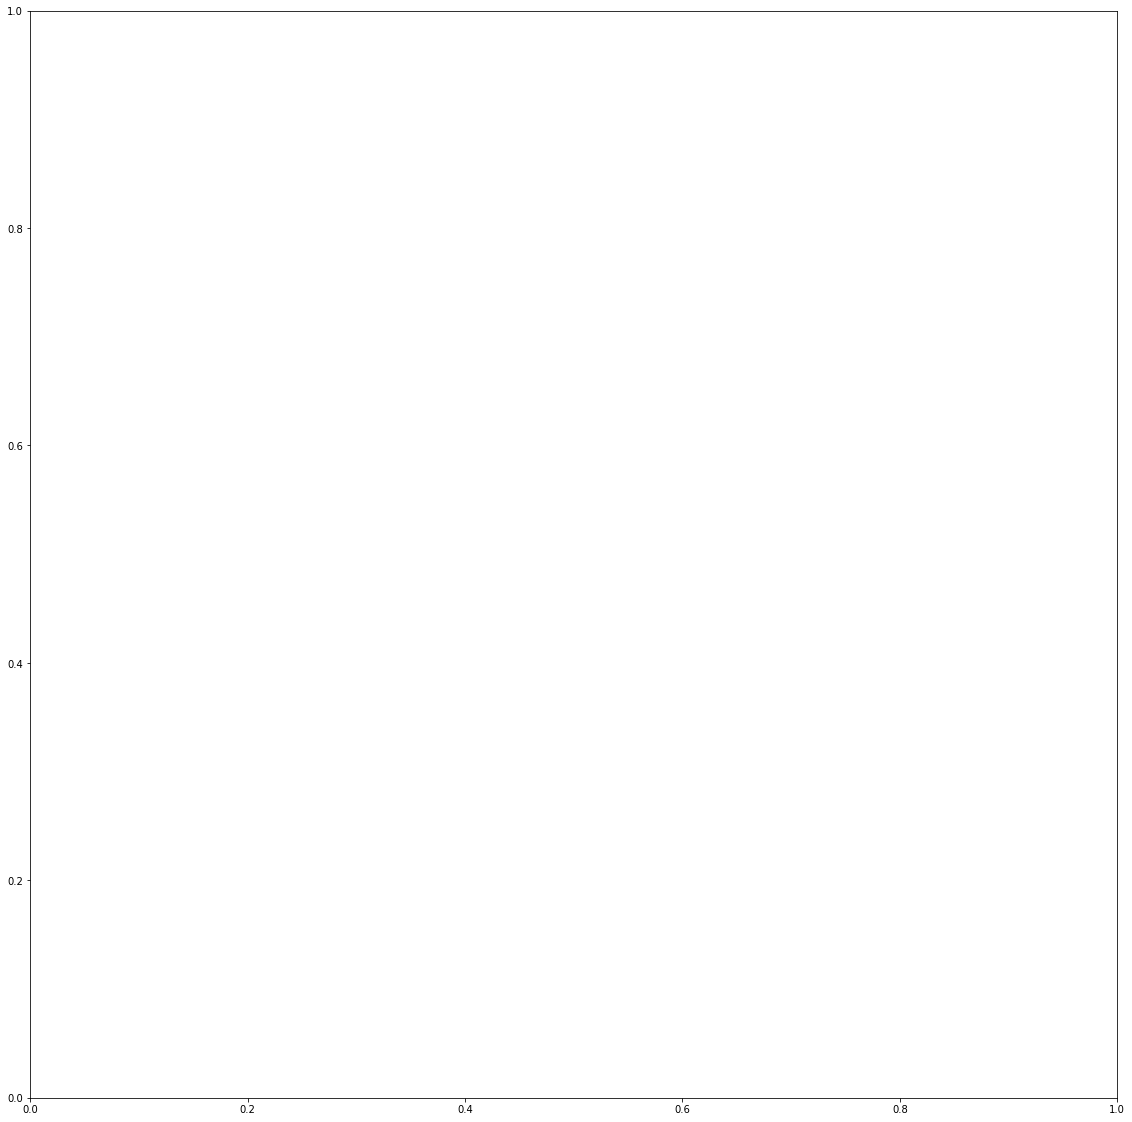

In [5]:
result_img = cv2.imread("../korad/images/train2022/C02_00036.tiff")
result_label = list(map(lambda x : x[44:], glob.glob("./runs/detect/yolov5_single_X6_test4/labels/*")))
result_label.sort()
for i in result_label:
    
    m_size = int(i.split("_")[2]) * 480
    n_size = int(i.split("_")[3][:-4]) * 320
    # print(m_size, n_size)

    with open("./runs/detect/yolov5_single_X6_test4/labels/"+i, "r") as f:                             
        for ff in f:
            data = ff.strip().split(" ")
            # print(data)                     
            result_img = cv2.rectangle(result_img, (int(data[1]) + n_size, int(data[2]) + m_size), (int(data[3]) + n_size, int(data[4]) + m_size), (0,0,255), 3)    
plt.figure(figsize=(20,20))
plt.imshow(result_img)
plt.show()
plt.close()

In [ ]:
temp_re = cv2.imread("./runs/detect/yolov5_single_X6_test2/C02_00036.tiff")
plt.figure(figsize=(20,20))
plt.imshow(temp_re)
plt.show()
plt.close()